In [ ]:
#Tensorflow basics (how to define a computation graph and run it in a session)
#Author: Tushar Mittal (@techytushar)

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Defining the computation graph
a = tf.constant(2.3)
b = tf.constant(4.1)
c = a+b
d = c*2.3
# Running the computation graph in a session
with tf.Session() as sess:
    print(sess.run(c))
print(c)

6.3999996
Tensor("add_2:0", shape=(), dtype=float32)


In [9]:
#Placeholder are datatypes whose values are provided later at runtime
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
z = x*y
with tf.Session() as sess:
    temp = sess.run(z,{x:[5,10],y:[[4],[2]]})
print(temp)

[[20. 40.]
 [10. 20.]]


In [21]:
# Implementing simple Linear Regression model
# Model parameters (W,b)
W = tf.Variable(.5, tf.float32)
b = tf.Variable(0., tf.float32)
#input and output
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
model = (W*x)+b
cost = tf.reduce_sum((model-y)**2)

#initializes all variables in the computation graph
init = tf.global_variables_initializer()
#defining an optimizer to update the parameter's values
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(cost)
costs = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(500):
        sess.run(train, {x:[1,2,3,4],y:[0,-1,-2,-3]})
        costs.append(sess.run(cost,{x:[1,2,3,4],y:[0,-1,-2,-3]}))

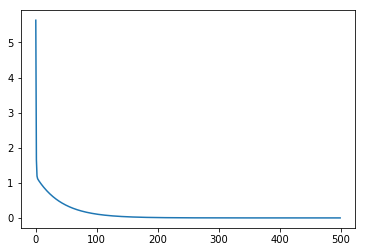

In [22]:
plt.plot(np.arange(500), costs)
plt.show()

In [ ]:
#using Tensorboard (run tensorboard --logdir="<Parent directory of graph file>")
File_Writer = tf.summary.FileWriter("ENTER PATH HERE", sess.graph)